## Task 13. Image blur


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the gpu version of the image blur algorithm. What you need to do is calculate convolution some image and some blur filter on every pixel. You should compute convolutions in parallel for every pixel using gpu cores.
* Take any 100x100 image

In [ ]:
pip install cupy-cuda111

In [ ]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

from scipy.ndimage import convolve as conv_np
from cupyx.scipy.ndimage import convolve as conv_cp

In [ ]:
#gaussian blur
sigma = 1

kernel_x = np.ones((5, 5)) * np.arange(-2, 3)
kernel_y = np.flip(kernel_x.T)
kernel_np = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(kernel_x ** 2 + kernel_y ** 2) / (2 * sigma ** 2)) 
kernel_cp = cp.array(kernel_np)

In [ ]:
def blur_np(img, kernel):
    x = np.empty_like(img)
    for i in range(3):
        x[:, :, i] = conv_np(img[:, :, i], kernel, mode='constant')
    return x

def blur_cp(img, kernel):
    x = cp.empty_like(img)
    for i in range(3):
        x[:, :, i] = conv_cp(img[:, :, i], kernel, mode='constant')
    return x

In [ ]:
images = [plt.imread(f'image{i}.png') for i in range(1,3)]

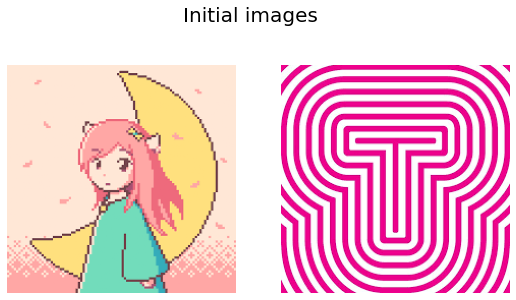

In [ ]:
plt.figure(figsize=(9, 5))
for i, im in enumerate(images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(im)
    plt.axis('off')
plt.suptitle("Initial images", fontsize=20)
plt.show()

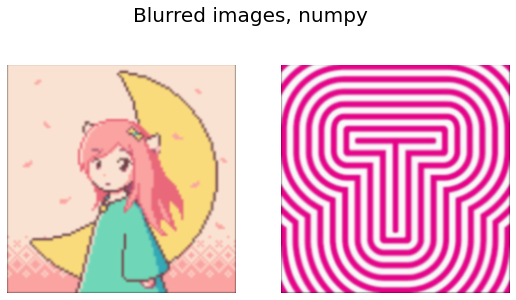

In [ ]:
plt.figure(figsize=(9, 5))
for i, im in enumerate(images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(blur_np(np.array(im), kernel_np))
    plt.axis('off')
plt.suptitle("Blurred images, numpy", fontsize=20)
plt.show()

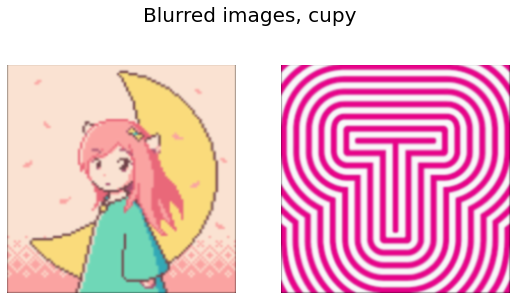

In [ ]:
plt.figure(figsize=(9, 5))
for i, im in enumerate(images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(blur_cp(cp.array(im), kernel_cp).get())
    plt.axis('off')
plt.suptitle("Blurred images, cupy", fontsize=20)
plt.show()

Time

In [ ]:
time_np = %timeit -o -r 10 -n 100 blur_np(np.array(images[0]), kernel_np)
time_np = time_np.best

100 loops, best of 10: 5.26 ms per loop


In [ ]:
time_cp = %timeit -o -r 10 -n 100 blur_cp(cp.array(images[0]), kernel_cp)
time_cp = time_cp.best

100 loops, best of 10: 579 µs per loop


In [ ]:
time_np / time_cp

9.097975504850423